In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
#read in the dataset
df=pd.read_csv('weather.csv',parse_dates=True,index_col=0)

In [3]:
#explore the dataset
df.shape

(3337, 22)

In [4]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


<AxesSubplot:xlabel='Temp3pm', ylabel='Humidity3pm'>

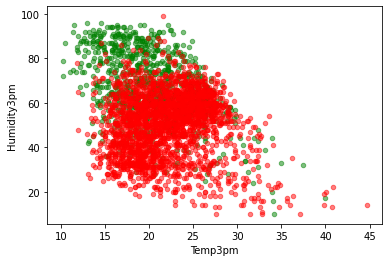

In [5]:
#is there a r/ship between variables Humidity3pm,Temp3pm and RainTomorrow, i.e,
#does humidity and temperature influence rain in the following day?

fig,ax=plt.subplots()
df[df["RainTomorrow"]=="Yes"].plot.scatter(x="Temp3pm",y="Humidity3pm",c="green",ax=ax,alpha=.5)
df[df["RainTomorrow"]=="No"].plot.scatter(x="Temp3pm",y="Humidity3pm",c="red",ax=ax,alpha=.5)

In [6]:
#the goal is to use Humidity3pm, Pressure3pm and Cloud3pm to predict RainTomorrow
df=df[["Humidity3pm","Pressure3pm","Cloud3pm","RainTomorrow"]]

In [7]:
df_clean=df.dropna() #dropping NAs

In [8]:
X=df_clean[["Humidity3pm","Pressure3pm","Cloud3pm"]]
y=df_clean["RainTomorrow"]

In [9]:
X

,Humidity3pm,Pressure3pm,Cloud3pm
Date,,,
2008-02-01,84.0,1017.4,8.0
2008-02-02,73.0,1016.4,7.0
2008-02-03,86.0,1015.6,8.0
2008-02-04,90.0,1011.8,8.0
2008-02-05,74.0,1004.8,8.0
...,...,...,...
2017-06-21,52.0,1025.3,2.0
2017-06-22,53.0,1024.6,2.0
2017-06-23,56.0,1015.0,6.0


In [10]:
y

Date
2008-02-01    Yes
2008-02-02    Yes
2008-02-03    Yes
2008-02-04    Yes
2008-02-05    Yes
             ... 
2017-06-21     No
2017-06-22     No
2017-06-23     No
2017-06-24     No
2017-06-25     No
Name: RainTomorrow, Length: 2754, dtype: object

In [11]:
y=np.array([0 if i=="No" else 1 for i in y])

In [12]:
#creating train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [13]:
model=KNeighborsClassifier() #define model
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7939042089985486